In [1]:
import pandas as pd
from scipy.io import arff
import os
os.chdir('C:/Users/fauza/OneDrive/Documents/Job/Skill Test/Smartfren/')
print(os.getcwd())

C:\Users\fauza\OneDrive\Documents\Job\Skill Test\Smartfren


In [107]:
file_path = 'data/Supply Chain Management_test.arff'
data, meta = arff.loadarff(file_path)
df = pd.DataFrame(data)
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

Total Rows: 1658
Total Columns: 296


In [110]:
df.describe()

,timeunit,storageCost,interestRate,compidx0lt2,compidx0lt2l1,compidx0lt2l2,compidx0lt2l4,compidx0lt2l8,compidx1lt2,compidx2lt2,...,MTLp7,MTLp8,MTLp9,MTLp10,MTLp11,MTLp12,MTLp13,MTLp14,MTLp15,MTLp16
count,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,...,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000
mean,112.370929,38.872135,7.623040,865.171235,865.214537,865.591143,866.571986,869.185811,1159.090729,740.450539,...,1656.314837,1718.279252,1217.178528,1289.641737,1296.537394,1360.931846,1674.382388,1746.954162,1731.548854,1801.917973
std,59.856159,7.800349,1.576724,223.120670,222.856976,222.631767,222.140738,220.829608,258.373929,202.915125,...,281.013142,298.717294,216.299574,232.930264,227.251267,247.066342,281.838885,288.539467,309.458146,315.008152
min,9.000000,27.000000,6.000000,540.413000,540.413000,540.413000,540.413000,540.413000,781.146000,536.787000,...,1125.000000,1175.000000,821.000000,875.000000,875.000000,932.000000,1075.000000,1141.000000,1125.000000,1200.000000
25%,61.000000,36.000000,6.000000,608.820500,608.820500,608.820500,608.820500,610.675000,930.193000,586.156500,...,1444.250000,1498.000000,1069.000000,1100.000000,1131.000000,1159.000000,1450.000000,1531.250000,1461.250000,1548.000000
50%,112.000000,36.000000,7.000000,897.000000,897.000000,898.321500,900.062500,905.382500,1127.885500,627.105000,...,1654.000000,1699.500000,1175.000000,1247.000000,1244.500000,1312.500000,1686.000000,1761.000000,1742.500000,1796.000000
75%,164.000000,45.000000,8.000000,1076.504000,1076.171500,1075.022750,1074.660750,1075.582750,1312.008250,875.454000,...,1825.000000,1893.000000,1383.000000,1468.000000,1466.750000,1557.000000,1874.750000,1952.000000,1973.750000,2029.000000
max,216.000000,50.000000,11.000000,1357.495000,1357.495000,1357.495000,1357.495000,1357.495000,2172.468000,1245.584000,...,2563.000000,2661.000000,1850.000000,1956.000000,1958.000000,2082.000000,2446.000000,2569.000000,2657.000000,2760.000000


In [39]:
target_features = [col for col in df.columns if col.startswith("MTLp") or col == "LBL"]
non_target_features = [col for col in df.columns if not (col.startswith("MTLp") or col == "LBL")]
print(f"total features = {len(features)}")
print(f"total target features = {len(non_target_features)}")

total features = 280
total target features = 280


In [32]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print(f"Missing value in data = {missing_values.sum()}")

Missing value in data = 0


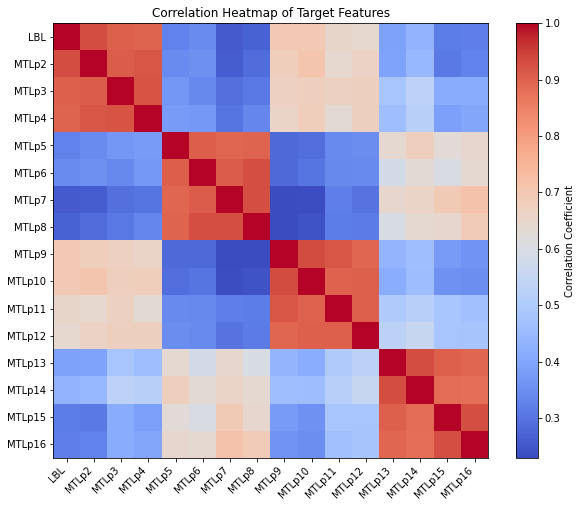

In [73]:
# Calculate and visualize correlation between target features
target_correlation_matrix = df[target_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
plt.imshow(target_correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation Coefficient")
plt.xticks(range(len(target_features)), target_features, rotation=45, ha="right")
plt.yticks(range(len(target_features)), target_features)
plt.title("Correlation Heatmap of Target Features")
plt.show()

In [75]:
outlier_summary = df[target_features].apply(
    lambda x: ((x < x.quantile(0.01)) | (x > x.quantile(0.99))).sum()
)
outlier_summary

LBL       34
MTLp2     33
MTLp3     34
MTLp4     33
MTLp5     33
MTLp6     34
MTLp7     27
MTLp8     34
MTLp9     33
MTLp10    34
MTLp11    33
MTLp12    34
MTLp13    34
MTLp14    34
MTLp15    34
MTLp16    34
dtype: int64

In [122]:
correlation_with_targets = df.corr()[target_features].drop(target_features)

top_correlated_features = {
    target: correlation_with_targets[target_features].abs().sort_values(by=target,ascending=False).head(10).index.tolist()
    for target in target_features
}

top_correlated_summary = {
    target: correlation_with_targets.loc[features, target]
    for target, features in top_correlated_features.items()
}

highly_correlated_features = correlation_with_targets.abs().mean(axis=1).sort_values(ascending=False).head(10)
top_features_to_visualize = highly_correlated_features.index.tolist()

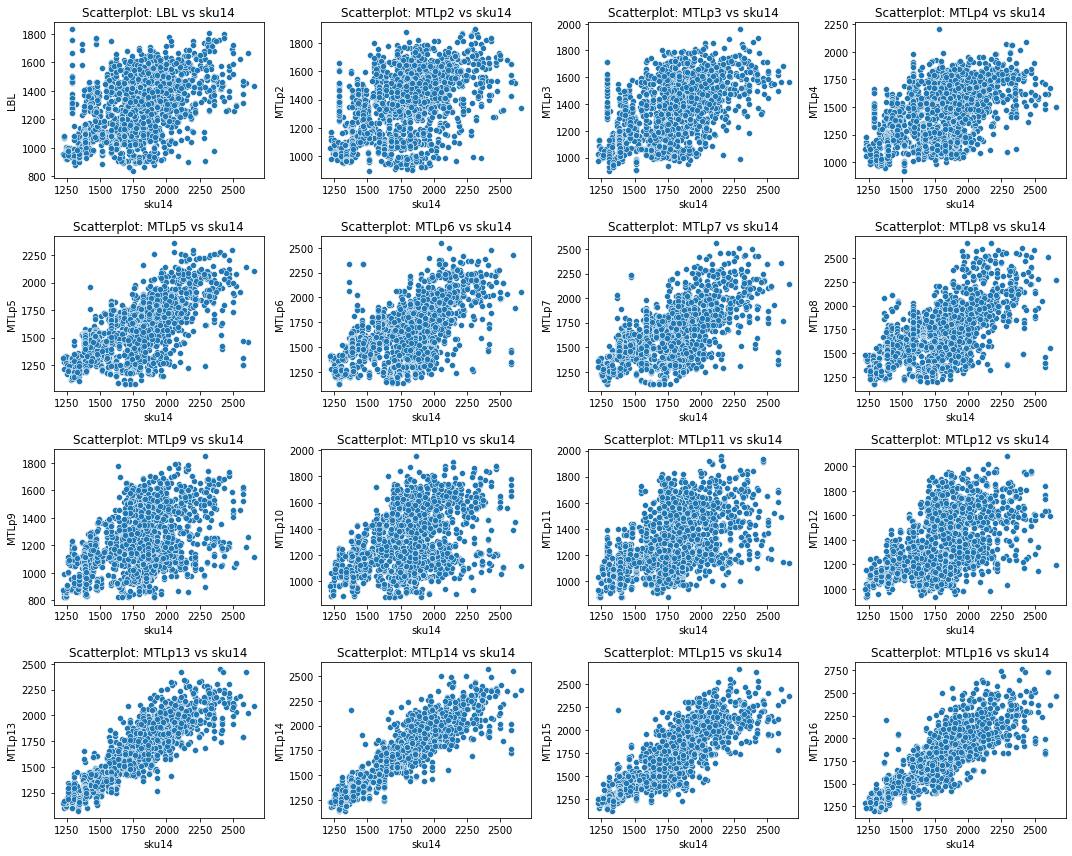

In [124]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(target_features):
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(data=df,x='sku14',y=feature)
    plt.ylabel(feature)
    plt.title(f"Scatterplot: {feature} vs sku14")
plt.tight_layout()
plt.show()

,timeunit,storageCost,interestRate,compidx0lt2,compidx0lt2l1,compidx0lt2l2,compidx0lt2l4,compidx0lt2l8,compidx1lt2,compidx2lt2,...,demandseg2,demandseg2l1,demandseg2l2,demandseg2l4,demandseg2l8,demandseg3,demandseg3l1,demandseg3l2,demandseg3l4,demandseg3l8
PC1,-0.083347,-0.037973,0.031144,-0.019884,-0.019973,-0.019869,-0.019880,-0.020003,0.043440,0.015127,...,0.033309,0.033722,0.034207,0.034741,0.035579,0.003718,0.004276,0.004749,0.005939,0.008471
PC2,-0.029569,0.062252,-0.083341,-0.019584,-0.019642,-0.019572,-0.019451,-0.019251,0.045404,-0.002818,...,-0.001108,-0.000398,0.000164,0.001366,0.003543,0.076816,0.077578,0.078335,0.079363,0.080886
PC3,0.038670,0.009400,-0.000953,-0.139985,-0.140397,-0.140529,-0.140204,-0.138806,-0.031695,-0.078446,...,-0.058029,-0.058479,-0.059154,-0.060255,-0.061609,0.010556,0.010121,0.009754,0.008871,0.007642
PC4,0.011243,0.041580,-0.125307,0.000690,0.000654,0.000576,0.000051,-0.001726,-0.105050,0.068811,...,0.028771,0.029123,0.029245,0.029569,0.028569,0.004019,0.003920,0.004111,0.004551,0.004229
PC5,0.020019,0.034296,0.005094,0.005757,0.004957,0.004502,0.003844,0.003187,-0.044547,0.006292,...,-0.056469,-0.056516,-0.056902,-0.058103,-0.058773,-0.051711,-0.050896,-0.050161,-0.048389,-0.043263
PC6,-0.018410,0.066705,0.008975,0.005434,0.005451,0.005225,0.004461,0.002147,0.122812,-0.182296,...,-0.027851,-0.028083,-0.028503,-0.027891,-0.028137,-0.010354,-0.008581,-0.007089,-0.003870,0.002155
PC7,0.002572,0.074564,-0.048393,0.041581,0.037873,0.034160,0.027378,0.019069,0.034932,-0.002212,...,-0.046657,-0.046745,-0.047186,-0.047985,-0.047420,-0.016114,-0.016532,-0.016852,-0.018472,-0.019324
PC8,0.032755,-0.165318,0.006535,-0.057028,-0.057926,-0.058319,-0.056687,-0.049414,-0.074293,0.076545,...,0.005706,0.004428,0.003338,0.001034,-0.004811,0.032303,0.032137,0.032047,0.031265,0.026703
PC9,0.077769,0.074277,-0.038645,-0.006749,-0.008372,-0.009487,-0.009804,-0.007226,0.006377,-0.032620,...,-0.134061,-0.133273,-0.132066,-0.129104,-0.122899,0.079767,0.081866,0.084616,0.087646,0.091251
PC10,0.007213,-0.007452,0.084533,0.047854,0.047911,0.047662,0.047082,0.047932,-0.030758,-0.101384,...,0.075480,0.075482,0.075678,0.075948,0.075261,0.054943,0.055777,0.057331,0.059990,0.064100


Index(['compidx8lt20l4', 'compidx8lt20l2', 'compidx8lt20l1', 'compidx8lt10l2',
       'compidx8lt10l1', 'compidx8lt10l4', 'compidx8lt10', 'compidx8lt20',
       'compidx8lt20l8', 'compidx12lt2l2',
       ...
       'demandseg3l4', 'compidx5lt2', 'demandseg3l2', 'demandseg3l1',
       'demandseg3', 'compidx0lt20', 'compidx0lt20l1', 'compidx0lt20l2',
       'compidx0lt20l8', 'compidx0lt20l4'],
      dtype='object', length=280)


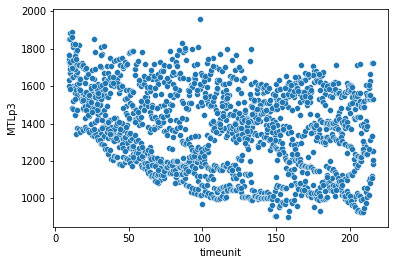

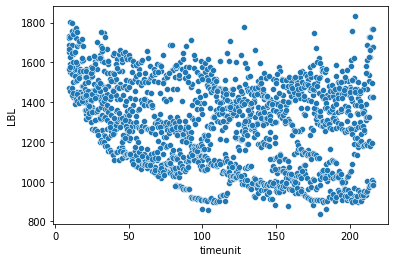

In [30]:
import seaborn as sns
from matplotlib import pyplot as plt

for i in ['MTLp3','LBL']:
    sns.scatterplot(data=df, x='timeunit',y=i)
    plt.show()